In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import font_manager, rc
# font_manager.get_fontconfig_fonts()
font_path = 'c:\\Windows\\Fonts\\NanumBarunGothic.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
%matplotlib inline

In [24]:
raw = pd.read_excel('data/2.1 EXERCISE.xlsx', skiprows=6)

In [59]:
data = raw.copy()

In [60]:
data.drop(data.columns[0], axis=1, inplace=True)

In [61]:
data.iloc[:, 2] = round(data.iloc[:, 2] * 100, 2)
data.iloc[:, 3] = round(data.iloc[:, 3], 2)
data.iloc[:, 4] = data.iloc[:, 4] * 100

In [62]:
data

,Tier,# of Accounts,% Accounts,Revenue ($M),% Revenue
0,A,77,7.08,4.68,25.0
1,A+,19,1.75,3.93,21.0
2,B,338,31.07,5.98,32.0
3,C,425,39.06,2.80,15.0
4,D,24,2.21,0.37,2.0


In [63]:
# 1단계: 데이터를 자세히 살펴보라. 어떤 점을 관찰할 수 있는가? 자료 해석에 추정이 필요한가? 데이터에서 궁금한 점은 무엇인가?
data.sum() # %의 총 합이 100이 아님

Tier             AA+BCD
# of Accounts       883
% Accounts        81.17
Revenue ($M)      17.76
% Revenue          95.0
dtype: object

In [64]:
# 2단계: 정보는 반드시 테이블로 전달해야 한다고 가정하자. 테이블이 설계된 전체 방식이나 데이터 제시 방법에 필요한 변화가 있는가? 개선된 테이블을 만들어라.
data = data.iloc[[1,0,2,3,4]].reset_index(drop=True) # Tier가 높은 순서로 정렬
data

,Tier,# of Accounts,% Accounts,Revenue ($M),% Revenue
0,A+,19,1.75,3.93,21.0
1,A,77,7.08,4.68,25.0
2,B,338,31.07,5.98,32.0
3,C,425,39.06,2.80,15.0
4,D,24,2.21,0.37,2.0


In [65]:
data = data.append(pd.DataFrame([['기타', 
                           round((data.iloc[:,1].sum() / data.iloc[:,2].sum())*100), 
                           100-data.iloc[:,2].sum(), 
                           round((data.iloc[:,3].sum() / data.iloc[:,4].sum())*100, 2), 
                           100-data.iloc[:,4].sum()]], columns=data.columns), ignore_index=True)

In [77]:
data.sum()[1:]

# of Accounts     1971
% Accounts       100.0
Revenue ($M)     36.45
% Revenue        100.0
dtype: object

In [83]:
data = data.append(pd.DataFrame([['TOTAL']+data.sum().tolist()[1:]], columns=data.columns), ignore_index=True)
data

,Tier,# of Accounts,% Accounts,Revenue ($M),% Revenue
0,A+,19,1.75,3.93,21.0
1,A,77,7.08,4.68,25.0
2,B,338,31.07,5.98,32.0
3,C,425,39.06,2.80,15.0
4,D,24,2.21,0.37,2.0
5,기타,1088,18.83,18.69,5.0
6,TOTAL,1971,100.00,36.45,100.0


In [92]:
data.

AttributeError: 'DataFrame' object has no attribute 'reverse'

In [134]:
data.iloc[5::-1]

,Tier,# of Accounts,% Accounts,Revenue ($M),% Revenue
5,기타,1088,18.83,18.69,5.0
4,D,24,2.21,0.37,2.0
3,C,425,39.06,2.80,15.0
2,B,338,31.07,5.98,32.0
1,A,77,7.08,4.68,25.0
0,A+,19,1.75,3.93,21.0


Text(0, 0.5, '')

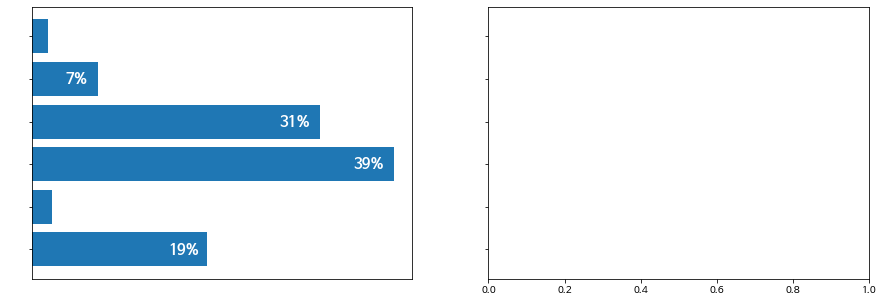

In [148]:
# 3단계: 주로 비교하고 싶은 것은 수익 분포 대비 계층별 계좌 분포라고 가정하자. 
# 더 크게 변화시켜도 무방하다(반드시 테이블일 필요는 없다). 데이터를 어떻게 시각화 하겠는가? 각자 선택한 툴로 그래프를 만들라.
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
axes[0].barh(data=data.iloc[5::-1], width='% Accounts', y='Tier', label=data.iloc[5::-1]['% Accounts'])
axes[0].set_yticks(data.iloc[5::-1].Tier, data.iloc[5::-1].Tier, color='w')
axes[0].set_xticks([])

for i, v in enumerate(data.iloc[5::-1]['% Accounts']):
    if v > 7:
        v = round(v)
        axes[0].text(v-1, i, str(v)+'%', color='w', fontsize=15, ha='right', va='center', fontweight='bold')

plt.xlabel('')
plt.ylabel('')